# Data Analysis Notebook 

This notebook is designed for the purpose of analyzing data obtained from the Hydra cluster. It provides a set of tools and techniques for performing data analysis tasks and extracting insights from the data.


## EE of the Cut for large range of system sizes


In [210]:
Sys.CPU_THREADS

6

In [211]:
using Base.Filesystem  # for creaating directories etc
using Random, Distributions  # random numbers
using HDF5  # hdf5 files
using QuantumClifford  # this is the stabilizer simulation package
using Plots # for plotting
using Formatting # string formatting
using LinearAlgebra # some useful matrices etc.
include("../AdditionalStructure/NewTypes.jl")
include("../AdditionalStructure/BitStringOps.jl")
include("../AdditionalStructure/Measurements.jl")
include("../AdditionalStructure/MICModels.jl")
include("../AdditionalStructure/ModelRuns.jl")
include("../AdditionalStructure/HelperTools.jl")
include("../AdditionalStructure/Iterators.jl");

exp_index = 1
dir_extension = "_2024-03-31"
file_prefix = "out/"
filename = "../Remote-Hydra/Toric_Code/data$(dir_extension)/$(file_prefix)TEE_exp:$(exp_index).h5"
data = h5read(filename, "/")

for key in keys(data)
    println("$key: $(data[key])")
end


In [212]:
dir_extension = "_2024-03-31"
file_prefix = "out/"
all_data = []

model_data_dict = Dict()

for exp_index in 1:800
    filename = "../Remote-Hydra/Toric_Code/data$(dir_extension)/$(file_prefix)TEE_exp:$(exp_index).h5"
    if ispath(filename)
        data = h5read(filename, "/")
        # print(data["L"],",")
        push!(all_data, data)
        model_data_dict[data["L"]] = data
    end
end
print("data sets read: ",length(all_data))

all_sizes = sort(collect(keys(model_data_dict)))

8-element Vector{Any}:
 24
 30
 36
 42
 48
 54
 60
 66

In [213]:
# Observables_t_p  = []
# for data in all_data
#     if data["L"] == 15
#         for i in 1:avr_back
#             push!(Observables_t_p, data["TEE"][end+1-i, :, :])
#         end
#     end
# end
# Observables_t_p_15  = cat(dims= 3, Observables_t_p...) # implement time averaging

In [214]:
avr_back = "all" # I will not use this at the moment!

CUT_dict_helper = Dict(
    size_key => [] for size_key in keys(model_data_dict)
)

for data in all_data
    size_key = data["L"]
    push!(CUT_dict_helper[size_key], permutedims(data["EE_cut"],(2,3,4,1)))
end

CUT_dict = Dict()

for size_key in all_sizes
    CUT_dict[size_key] = cat(dims= 4, CUT_dict_helper[size_key]...)
end

CUT_means = Dict()
CUT_vars = Dict()
CUT_errs = Dict()
CUT_medians = Dict()

for size_key in all_sizes
    CUT_means[size_key] = mean(CUT_dict[size_key], dims = 4)
    CUT_vars[size_key] = var(CUT_dict[size_key], dims = 4)
    CUT_errs[size_key] = std(CUT_dict[size_key], dims = 4) / sqrt(size(CUT_dict[size_key], 4))
    CUT_medians[size_key] = median(CUT_dict[size_key], dims = 4)
end

CUT_Stats = Dict(
    "mean" => CUT_means,
    "var" => CUT_vars,
    "err" => CUT_errs,
    "median" => CUT_medians
)


Dict{String, Dict{Any, Any}} with 4 entries:
  "median" => Dict(54=>[0.0 0.0 0.0;;; 98.0 80.0 23.0;;; 140.0 125.0 25.0;;; … …
  "err"    => Dict(54=>[0.0 0.0 0.0;;; 0.0294594 0.0465697 0.0432419;;; 0.03612…
  "mean"   => Dict(54=>[0.0 0.0 0.0;;; 98.1049 80.3682 22.8868;;; 140.19 125.31…
  "var"    => Dict(54=>[0.0 0.0 0.0;;; 8.67856 21.6874 18.6987;;; 13.0476 40.57…

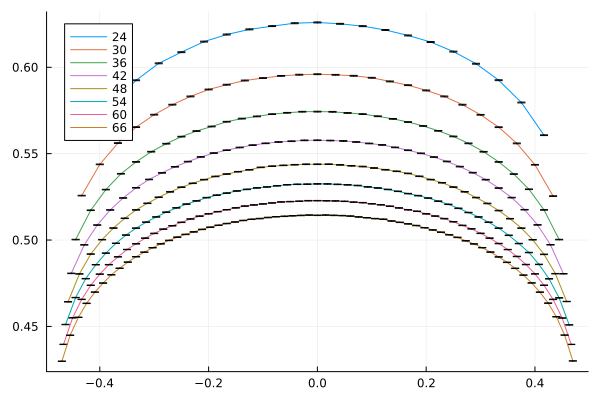

In [215]:
stat = "mean"
ribbon = "err"
p_f_ind = 1
p_b_ind = 1

plot()
for size_key in all_sizes
    x_axis = model_data_dict[size_key]["subdiv_array"] .- size_key/2
    x_axis = x_axis./size_key
    y_axis = CUT_Stats[stat][size_key][p_f_ind, p_b_ind, :]
    volume_scale = size_key^2
    area_scale = size_key
    critical_scale = size_key*log2(size_key)
    scale = critical_scale
    y_axis = y_axis./scale
    y_err = CUT_Stats[ribbon][size_key][p_f_ind, p_b_ind, :]
    y_err = y_err./scale 
    plot!(x_axis[3:end-2], y_axis[3:end-2], yerror = y_err[3:end-2], label = size_key)
end

plot!()

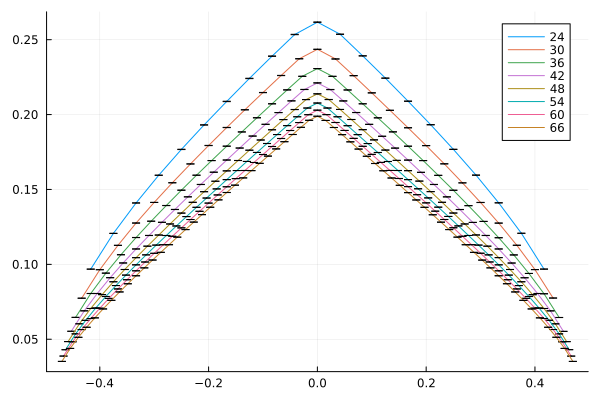

In [216]:
stat = "mean"
ribbon = "err"
p_f_ind = 1
p_b_ind = 2

plot()
for size_key in all_sizes
    x_axis = model_data_dict[size_key]["subdiv_array"] .- size_key/2
    x_axis = x_axis./size_key
    y_axis = CUT_Stats[stat][size_key][p_f_ind, p_b_ind, :]
    volume_scale = size_key^2
    area_scale = size_key
    critical_scale = size_key*log2(size_key)
    scale = volume_scale
    y_axis = y_axis./scale
    y_err = CUT_Stats[ribbon][size_key][p_f_ind, p_b_ind, :]
    y_err = y_err./scale 
    plot!(x_axis[3:end-2], y_axis[3:end-2], yerror = y_err[3:end-2], label = size_key)
end

plot!()

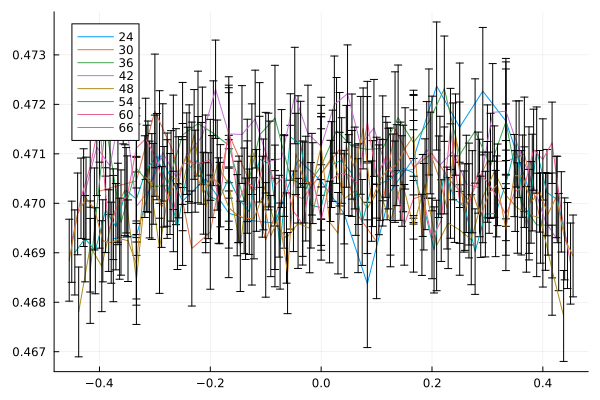

In [221]:
stat = "mean"
ribbon = "err"
p_f_ind = 1
p_b_ind = 3

plot()
for size_key in all_sizes
    x_axis = model_data_dict[size_key]["subdiv_array"] .- size_key/2
    x_axis = x_axis./size_key
    y_axis = CUT_Stats[stat][size_key][p_f_ind, p_b_ind, :]
    volume_scale = size_key^2
    area_scale = size_key
    critical_scale = size_key*log2(size_key)
    scale = area_scale
    y_axis = y_axis./scale
    y_err = CUT_Stats[ribbon][size_key][p_f_ind, p_b_ind, :]
    y_err = y_err./scale 
    plot!(x_axis[4:end-3], y_axis[4:end-3], yerror = y_err[4:end-3], label = size_key)
end

plot!()

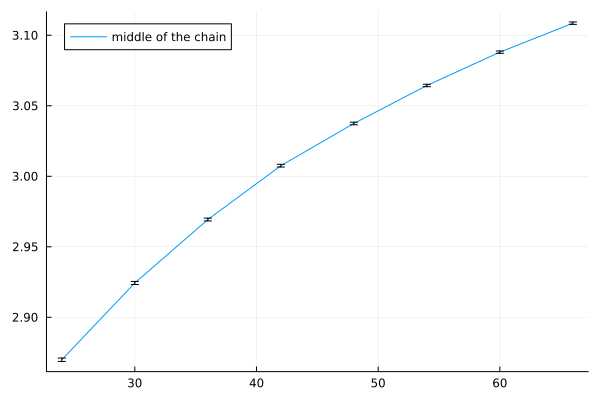

In [218]:
stat = "mean"
ribbon = "err"
p_f_ind = 1
p_b_ind = 1

funct = []
err = []
for size_key in all_sizes
    push!(funct, CUT_Stats[stat][size_key][p_f_ind, p_b_ind, round(Int, end/2+0.5)])
    push!(err, CUT_Stats[ribbon][size_key][p_f_ind, p_b_ind, round(Int, end/2+0.5)])    
end

crit = all_sizes .* log2.(all_sizes)
vol = all_sizes.^2
area = all_sizes

corre = area

plot(all_sizes, funct./corre, yerr = err./corre, label = "middle of the chain")

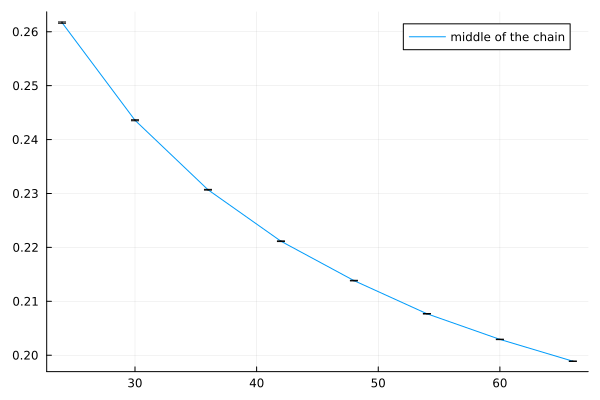

In [219]:
stat = "mean"
ribbon = "err"
p_f_ind = 1
p_b_ind = 2

funct = []
err = []
for size_key in all_sizes
    push!(funct, CUT_Stats[stat][size_key][p_f_ind, p_b_ind, round(Int, end/2+0.5)])
    push!(err, CUT_Stats[ribbon][size_key][p_f_ind, p_b_ind, round(Int, end/2+0.5)])    
end

crit = all_sizes .* log2.(all_sizes)
vol = all_sizes.^2
area = all_sizes

corre = vol

plot(all_sizes, funct./corre, yerr = err./corre, label = "middle of the chain")

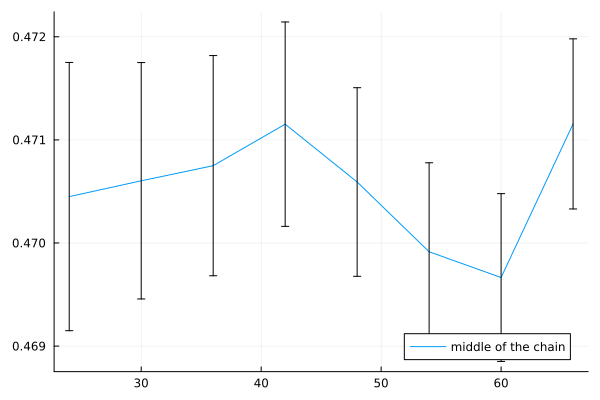

In [220]:
stat = "mean"
ribbon = "err"
p_f_ind = 1
p_b_ind = 3

funct = []
err = []
for size_key in all_sizes
    push!(funct, CUT_Stats[stat][size_key][p_f_ind, p_b_ind, round(Int, end/2+0.5)])
    push!(err, CUT_Stats[ribbon][size_key][p_f_ind, p_b_ind, round(Int, end/2+0.5)])    
end

crit = all_sizes .* log2.(all_sizes)
vol = all_sizes.^2
area = all_sizes

corre = area

plot(all_sizes, funct./corre, yerr = err./corre, label = "middle of the chain")